#Derivatives

In [2]:
import torch
import numpy as np
import pandas as pd

In [20]:
x=torch.tensor(7.0,requires_grad=True)   #remember to have float values
y=x**2
y.backward()  #finding the derivative of it
print(x.grad)  #gradient when x is 7.0

"""if you want to retain the graph we have to zero out the gradient
x.grad.zero_()
y.backward(retain_graph=True)"""

#bit more complex example

p=torch.tensor(7.0,requires_grad=True)
q=p**2 + 3*p + 100
q.backward()
print(p.grad)

tensor(14.)
tensor(17.)


###Partial derivatives

In [27]:
u=torch.tensor(1.0,requires_grad=True)
v=torch.tensor(2.0,requires_grad=True)
f=u*v +u**2
f.backward()
#to access the partial derivative of f with respect to u
print(u.grad)
#simillarly for v
print(v.grad)


tensor(4.)
tensor(1.)


####Trick to find derivative at every point
if we have x**2 (lets understand this with 3 example)
we will find derivative at each of this 3 value, to do so we define function x1^2 +x2^2+x3^2, we then differenciate it
we get [2.x1 2.x2 2.x3] then we simply put values we get our derivative at every point 



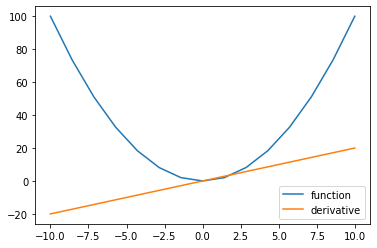

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline  

x=torch.linspace(-10,10, 15, requires_grad=True)
Y=x**2
y_sum=torch.sum(x**2)
y_sum.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label="function")  #remember when we have a tensor with requires_grad=True we have to use detach() before converting it to np array
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label="derivative")
plt.legend()

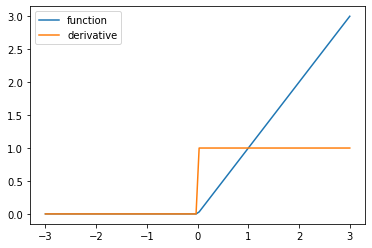

In [40]:
import torch.nn.functional as F
p=torch.linspace(-3,3, 100, requires_grad=True)
Q=F.relu(p)
q_sum=torch.sum(F.relu(p))
q_sum.backward()
plt.plot(p.detach().numpy(), Q.detach().numpy(), label="function") 
plt.plot(p.detach().numpy(), p.grad.detach().numpy(), label="derivative")
plt.legend()